DÚVIDAS

    como é q o dropout pode ajudar no overfit

    como é q o batch size pode mudar o treino

In [280]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras import layers, models

In [281]:
# train data
X_TRAIN = np.load("Xtrain_Classification_Part2.npy")
Y_TRAIN = np.load("Ytrain_Classification_Part2.npy")

# test data
X_TEST = np.load("Xtest_Classification_Part2.npy")

print(X_TRAIN.shape, Y_TRAIN.shape, X_TEST.shape)

X_TRAIN = X_TRAIN.reshape(X_TRAIN.shape[0], 50,50,1) / 255
# Y_TRAIN = Y_TRAIN.reshape(Y_TRAIN.shape[0], 1)

X_TEST = X_TEST.reshape(X_TEST.shape[0], 50,50,1) / 255

print(X_TRAIN.shape, Y_TRAIN.shape, X_TEST.shape)

(7366, 2500) (7366,) (1290, 2500)
(7366, 50, 50, 1) (7366,) (1290, 50, 50, 1)


Function to display 30 images with labels in a grid of 5x6

In [282]:
def showImages(images, labels, offset = 0):
    class_names = ['Caucasian', 'African', 'Asian', 'Indian']

    plt.figure(figsize=(10,10))
    for i in range(30):
        plt.subplot(5,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i+offset], cmap="gray")

        plt.xlabel(class_names[ int( np.argmax(labels[i+offset]) ) ])
    plt.show()

In [283]:
# showImages(X_TRAIN, Y_TRAIN)

In [284]:
train_img,test_img,train_labels,test_labels = train_test_split(X_TRAIN,Y_TRAIN,test_size=0.2)

In [285]:
model = models.Sequential(name="Manel")
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation="softmax"))

model.summary()

Model: "Manel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 9, 9, 64)          36928 

In [286]:
model.compile(optimizer='adam',
                #estamos a usar sparse categorical em vez de categorical cross entropy pq estamos a dar as classes como inteiros entre 0 e 3
                #em vez da one hot enconding
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_img, train_labels, epochs=50, #batch_size=8, #batch size default é 32, aumentando fica pior (not sure why)
                    validation_data=(test_img, test_labels), verbose=0, callbacks=[callback])

print(f"Trained during {len(history.history['loss'])} epochs")

Trained during 29 epochs


acc is 0.8690637946128845


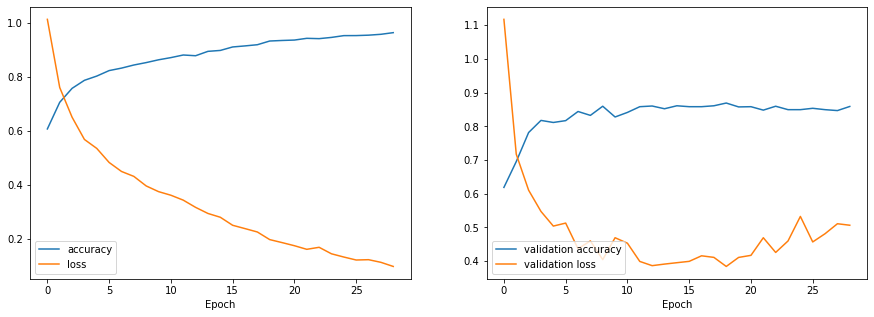

In [287]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')

test_loss, test_acc = model.evaluate(test_img,  test_labels, verbose=0)

print(f"acc is {test_acc}")

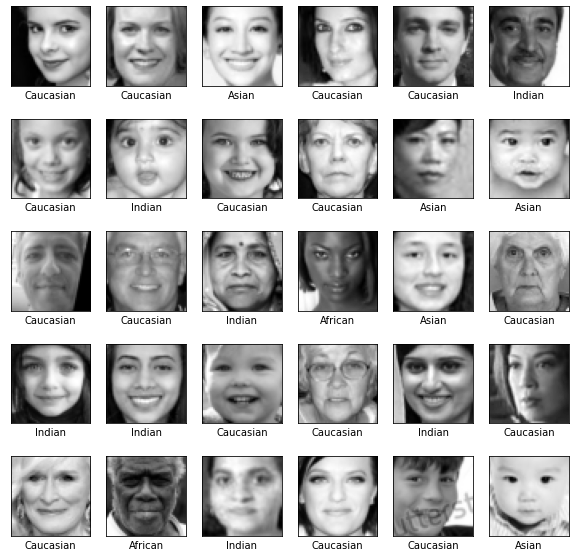

(1290,)
[0 0 2 0 0 3 0 3 0 0 2 2 0 0 3 1 2 0 3 3 0 0 3 0 0 1 3 0 0 2]


In [288]:
predicted_Labels = model.predict(X_TEST)

showImages(X_TEST, predicted_Labels, offset=10)

y_pred = np.array([np.argmax(label) for label in predicted_Labels])
print(y_pred.shape)
print(y_pred[10:40])